In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
class SimpleNN_1(nn.Module):
    def __init__(self, input_size = 4, hidden_size1 = 8, hidden_size2 = 8, output_size = 3):
        super(SimpleNN_1, self).__init__() #instantiate the NN model
        # Define the layers of the neural network
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.out = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x)) # Apply ReLU activation function to introduce non-linearity
        x = self.fc2(x)
        return x

In [3]:
#Pick a manual seed for randomisation
torch.manual_seed(23)

#Create an instance of the model
model = SimpleNN_1()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
# Display the first few rows of the DataFrame
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Change the last column 'species' to numerical values
my_df['species'] = my_df['species'].replace({'setosa': 0.0, 'versicolor': 1.0, 'virginica': 2.0})
my_df.head()

C:\Users\rober\AppData\Local\Temp\ipykernel_13212\2866276511.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace({'setosa': 0.0, 'versicolor': 1.0, 'virginica': 2.0})


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
# Train Test Split
X = my_df.iloc[:, :-1].values  # Features (all columns except the last)
y = my_df.iloc[:, -1].values   # Target (last column)
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
import random

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=random.randint(0, 100))

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [11]:
# Set the criterion of the model to measure the error
criterion = nn.CrossEntropyLoss()

# Set the optimizer to update the model parameters and set learning rate
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [12]:
model.parameters

<bound method Module.parameters of SimpleNN_1(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)>

In [13]:
# Train model
epochs = 100
losses = []
for epoch in range(epochs):
    outputs = model(X_train)  # Forward pass
    loss = criterion(outputs, y_train)  # Compute the loss
    losses.append(loss.detach().numpy())  # Store the loss for plotting
    if (epoch + 1) % 10 == 0:  # Print loss every 10 epochs
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
    
    # Backpropagation and optimization
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()  # Backward pass
    optimizer.step()  # Update the weights

Epoch [10/100], Loss: 1.2098
Epoch [20/100], Loss: 0.8072
Epoch [30/100], Loss: 0.6114
Epoch [40/100], Loss: 0.5082
Epoch [50/100], Loss: 0.4417
Epoch [60/100], Loss: 0.3920
Epoch [70/100], Loss: 0.3473
Epoch [80/100], Loss: 0.3045
Epoch [90/100], Loss: 0.2644
Epoch [100/100], Loss: 0.2287


2.1833255


Text(0, 0.5, 'Loss')

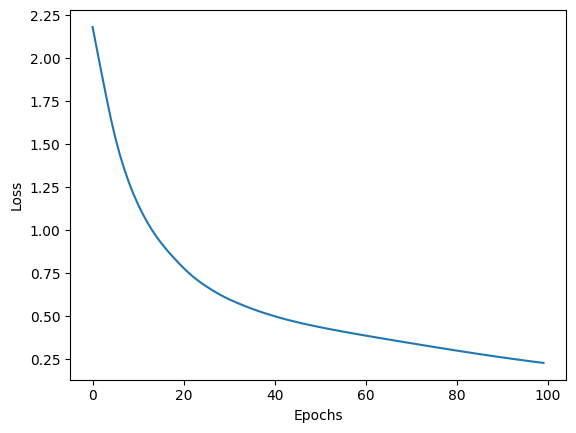

In [14]:
print(losses[0])
epoch_range = range(epochs)
plt.plot(epoch_range, losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [15]:
# Evaluate model on Test Data set
with torch.no_grad(): # Disable backpropagation
    y_eval = model(X_test)  # Forward pass on test data
    loss = criterion(y_eval, y_test)  # Compute the loss on test data
    

In [16]:
loss

tensor(0.1783)

In [17]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model(data)

        if i < 5:
            print(f'{i+1}.)  {str(y_val)} \t {y_test[i]}')

        # Verify if the prediction is correct
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'Accuracy: {correct / len(X_test) * 100:.2f}%')
print(f'Total correct predictions: {correct} out of {len(X_test)}')

1.)  tensor([-3.5228,  4.1416,  5.9503, -5.6603, -6.5521, -5.3259, -7.3669, -7.0428]) 	 2
2.)  tensor([ 6.1262,  2.9861, -3.8816, -4.7899, -3.2807, -2.3827, -4.7107, -3.9380]) 	 0
3.)  tensor([ 1.2909,  3.4953,  0.9245, -5.0270, -4.7914, -3.6595, -5.8364, -5.3277]) 	 1
4.)  tensor([ 0.3849,  3.6028,  1.8880, -5.1743, -5.1261, -4.0116, -6.1509, -5.6565]) 	 1
5.)  tensor([-3.7343,  4.0512,  6.1587, -5.5568, -6.4677, -5.3464, -7.2802, -6.9640]) 	 2
Accuracy: 100.00%
Total correct predictions: 30 out of 30


In [18]:
new_iris = torch.tensor([[9.7, 3.2, 1.3, 4.2]])

In [20]:
with torch.no_grad():
    prediction = model(new_iris).argmax().item()

print(f'{prediction}')

1


In [21]:
# Save netural network model
torch.save(model.state_dict(), 'simple_iris_model.pt')

In [22]:
new_model = SimpleNN_1()
new_model.load_state_dict(torch.load('simple_iris_model.pt'))

<All keys matched successfully>

In [23]:
new_model.eval()

SimpleNN_1(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)